In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

In [ ]:
# upload googl drive
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np



In [ ]:
train_loc = '/content/drive/My Drive/our_DATA/train/'
test_loc= '/content/drive/My Drive/our_DATA/val/'

In [ ]:
trdata = ImageDataGenerator(rescale=1./255,
                            shear_range = 0.2,
                            zoom_range =0.2,
                            horizontal_flip= True ,  )
                              
traindata = trdata.flow_from_directory(directory=train_loc ,target_size =(224,224))

tsdata = ImageDataGenerator(rescale=1./255,
                            shear_range = 0.2,
                            zoom_range =0.2,
                            horizontal_flip= True , )
                              
testndata = tsdata.flow_from_directory(directory=test_loc ,target_size =(224,224))


Found 278 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [ ]:
traindata.class_indices

{'COVED+': 0, 'COVED-': 1}

In [ ]:
input_shape=(224,224,3)
#input layer
img_input = Input(shape = input_shape , name ='img_input')
#bulid model 
x=Conv2D(32,(3,3),padding ='same',activation='relu',name='layer_1')(img_input)


x=Conv2D(64,(3,3),padding ='same',activation='relu',name='layer_2')(x)
x=MaxPool2D((2,2) , strides=(2,2),name='layer_3')(x)
x=Dropout(0.25)(x)

x=Conv2D(64,(3,3),padding ='same',activation='relu',name='layer_4')(x)
x=MaxPool2D((2,2) , strides=(2,2),name='layer_5')(x)
x=Dropout(0.25)(x)


x=Conv2D(128,(3,3),padding ='same',activation='relu',name='layer_6')(x)
x=MaxPool2D((2,2) , strides=(2,2),name='layer_7')(x)
x=Dropout(0.25)(x)

x= Flatten(name='layer_8') (x)
x=Dense(64,name = 'layer_9') (x)
x=Dropout(0.50)(x)
x= Dense(2,activation='sigmoid',name='predections')(x)


In [ ]:
#generat model
model =Model(inputs=img_input,outputs=x,name='covid_19')

In [ ]:
# pint network structure
model.summary()

Model: "covid_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_input (InputLayer)       [(None, 224, 224, 3)]     0         
_________________________________________________________________
layer_1 (Conv2D)             (None, 224, 224, 32)      896       
_________________________________________________________________
layer_2 (Conv2D)             (None, 224, 224, 64)      18496     
_________________________________________________________________
layer_3 (MaxPooling2D)       (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
layer_4 (Conv2D)             (None, 112, 112, 64)      36928     
_________________________________________________________________
layer_5 (MaxPooling2D)       (None, 56, 56, 64)        0  

In [ ]:
# Cmpiling the model
model.compile(optimizer = 'adam', loss = binary_crossentropy , metrics=['accuracy'])

In [ ]:
batch_size = 30
hist = model.fit(traindata, 
                 steps_per_epoch = traindata.samples//batch_size,
                 validation_data = testndata,
                 validation_steps = testndata.samples//batch_size,
                 epochs = 40
                 )

Epoch 1/40
9/9 [==============================] - 93s 10s/step - loss: 0.2399 - accuracy: 0.9029 - val_loss: 0.2918 - val_accuracy: 0.9062
Epoch 2/40
9/9 [==============================] - 93s 10s/step - loss: 0.2338 - accuracy: 0.9065 - val_loss: 0.2701 - val_accuracy: 0.9375
Epoch 3/40
9/9 [==============================] - 93s 10s/step - loss: 0.2093 - accuracy: 0.9353 - val_loss: 0.3049 - val_accuracy: 0.9062
Epoch 4/40
9/9 [==============================] - 96s 11s/step - loss: 0.1423 - accuracy: 0.9496 - val_loss: 0.1970 - val_accuracy: 0.9375
Epoch 5/40
9/9 [==============================] - 92s 10s/step - loss: 0.1819 - accuracy: 0.9353 - val_loss: 0.2653 - val_accuracy: 0.9062
Epoch 6/40
9/9 [==============================] - 93s 11s/step - loss: 0.2284 - accuracy: 0.9353 - val_loss: 0.2701 - val_accuracy: 0.8750
Epoch 7/40
9/9 [==============================] - 93s 10s/step - loss: 0.1555 - accuracy: 0.9568 - val_loss: 0.3794 - val_accuracy: 0.8750
Epoch 8/40
9/9 [===========

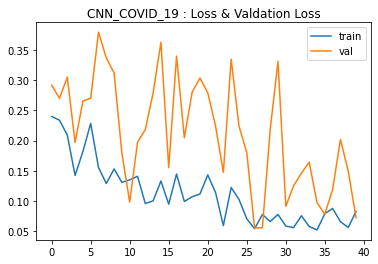

In [ ]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label= 'val')
plt.title('CNN_COVID_19 : Loss & Valdation Loss')
plt.legend()
plt.show()


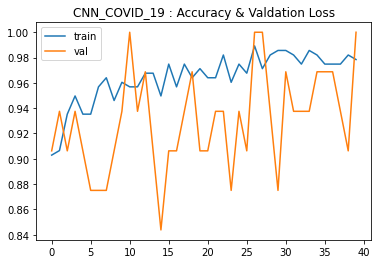

In [ ]:
import numpy as np

plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label= 'val')
plt.title('CNN_COVID_19 : Accuracy & Valdation Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[34 25]
 [30 29]]
classification_Report
              precision    recall  f1-score   support

      COVID+       0.53      0.58      0.55        59
      COVID-       0.54      0.49      0.51        59

    accuracy                           0.53       118
   macro avg       0.53      0.53      0.53       118
weighted avg       0.53      0.53      0.53       118



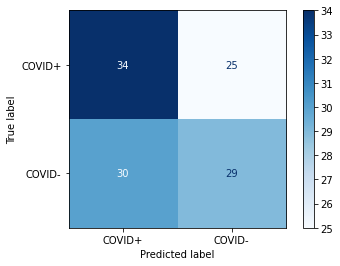

In [ ]:
target_names = ['COVID+', 'COVID-']
label_names = [0,1]

Y_pred = model.predict_generator(testndata)
y_pred = np.argmax(Y_pred ,  axis = 1)

cm = confusion_matrix(testndata.classes, y_pred, labels = label_names)


print('Confusion Matrix')
print(confusion_matrix(testndata.classes, y_pred))

print('classification_Report')
print(classification_report(testndata.classes, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()